In [25]:
#read package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Train Test Split
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, f1_score,precision_score,recall_score,classification_report
from sklearn.metrics import roc_curve, auc
from scipy.stats import chi2_contingency

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import classification_report
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel

from sklearn import svm
from scipy import stats

In [2]:
df_bat = pd.read_csv('/Users/quinne/Desktop/encode.csv')

In [3]:
df_bat

,Result,match_number,total_score,total_wickets_player_out,team,opponent,gender,season,month,day,...,city,toss_winner,winner,choose_to_bat,forced_to_bat,avg_win_rate,avg_score,avg_wickets_out,last_match_result,toss_result
0,0,1.0,135,6,2,4,0,2021,7,21,...,3,2,4,1,0,0.000000,0.000000,0.000000,0,0
1,1,1.0,145,8,4,2,1,2021,7,22,...,3,2,4,0,1,0.000000,0.000000,0.000000,0,0
2,0,2.0,128,6,0,1,0,2021,7,23,...,0,1,1,0,1,0.000000,0.000000,0.000000,0,1
3,0,2.0,144,6,1,0,1,2021,7,23,...,0,0,0,0,1,0.000000,0.000000,0.000000,0,1
4,1,3.0,133,5,5,6,0,2021,7,24,...,5,6,5,0,1,0.000000,0.000000,0.000000,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,0,32.0,143,9,4,2,1,2022,8,31,...,4,4,2,1,0,0.571429,147.285714,6.071429,1,0
119,0,40.0,150,7,1,2,1,2022,9,2,...,6,1,2,1,0,0.400000,145.200000,5.933333,0,0
120,1,40.0,134,6,5,6,0,2022,9,2,...,6,6,5,0,1,0.800000,125.066667,5.800000,0,0
121,0,50.0,120,9,2,6,1,2022,9,3,...,3,2,6,1,0,0.533333,157.400000,6.333333,1,0


### PCA or Lasso?

In [4]:
X = df_bat.drop('Result', axis=1)
y = df_bat['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline for scaling, PCA, and logistic regression
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('logistic', LogisticRegression())
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Using Lasso for feature selection
lasso = LogisticRegression(penalty='l1', solver='liblinear')
selector = SelectFromModel(estimator=lasso)

# Create pipeline for scaling, feature selection, and logistic regression
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', selector),
    ('logistic', LogisticRegression())
])

# Fit and evaluate the model
pipe_lasso.fit(X_train, y_train)
y_pred_lasso = pipe_lasso.predict(X_test)
print(classification_report(y_test, y_pred_lasso))
print(confusion_matrix(y_test, y_pred_lasso))

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.69      0.75      0.72        12

    accuracy                           0.72        25
   macro avg       0.72      0.72      0.72        25
weighted avg       0.72      0.72      0.72        25

[[9 4]
 [3 9]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        13
           1       0.83      0.83      0.83        12

    accuracy                           0.84        25
   macro avg       0.84      0.84      0.84        25
weighted avg       0.84      0.84      0.84        25

[[11  2]
 [ 2 10]]


In [5]:
x = df_bat.values
x = StandardScaler().fit_transform(x) # Standardize the features

# Create a PCA that will retain 80% of the variance
pca = PCA(n_components=0.80, whiten=True)
x_pca = pca.fit_transform(x)

print('Number of PCA components: ', pca.n_components_)

Number of PCA components:  10


/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 390, in fit
    Xt = self._fit(X, y, **fit_params_steps)
  File "/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/pipeline.py", line 348, in _fit
    X, fitted_transformer = fit_tra

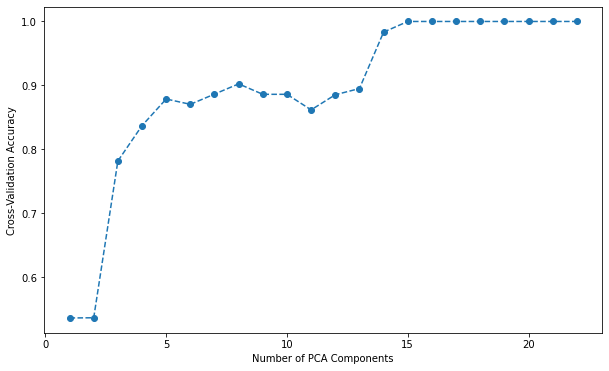

In [6]:
#cross_validation to find the best number of components
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)
cross_val_scores = []

for components in range(1, 25):
    pca = PCA(n_components=components)    
    pipeline = Pipeline(steps=[('s',pca),('m',logistic_regression)])
    scores = cross_val_score(pipeline, x, df_bat['Result'], cv=5)
    cross_val_scores.append(scores.mean())

plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), cross_val_scores, marker='o', linestyle='--')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validation Accuracy')
plt.show()

In [7]:
# Create a PCA instance with 10 components
pca = PCA(n_components=10, whiten=True)
x_pca = pca.fit_transform(x)

print('Number of PCA components: ', pca.n_components_)

explained_variance = pca.explained_variance_ratio_
print("Explained Variance: ", explained_variance)

print("First 10 rows of transformed features: ")
print(x_pca[:10,])

Number of PCA components:  10
Explained Variance:  [0.13998817 0.12378853 0.1129596  0.09819579 0.07378663 0.05975454
 0.05668929 0.0510318  0.04880409 0.04350073]
First 10 rows of transformed features: 
[[ 3.14071086  0.86840522 -0.79516648 -1.51483493 -0.23242869  0.18792067
   0.76031136 -0.01408938 -1.46111636  0.57561017]
 [ 3.02044076  0.93690001  0.98409688 -0.15520287  0.01839839  0.20768989
   0.87558559  1.03610641 -1.04618943 -1.2905068 ]
 [ 3.68013835 -0.21140574  0.50922423  0.81695974 -0.66090872  0.21827803
  -0.11396124 -0.41849222 -0.96795741 -0.64844358]
 [ 3.73443577 -0.61765294  0.54749115  0.27697484 -0.71971091 -1.47728755
  -0.21677993  0.13244188 -0.73928367 -0.62883574]
 [ 2.30000262  2.77843632  0.55929849 -0.44086791  0.66949198  0.06841681
   1.0908736  -0.33997114 -1.78339085  0.10023312]
 [ 2.38218012  2.46423716 -1.29482813 -1.67799059 -0.46845703 -0.36993123
   0.70038203  1.15426369 -0.95504174 -0.34554914]
 [ 3.27761281  0.97956028 -0.23856855  1.04626

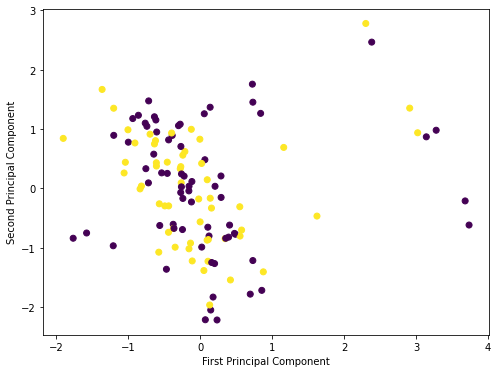

In [8]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0], x_pca[:,1], c=df_bat['Result'])
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

Cumulative variance ratio:  [0.13998817 0.26377671 0.37673631 0.4749321  0.54871873 0.60847327
 0.66516256 0.71619436 0.76499845 0.80849917]


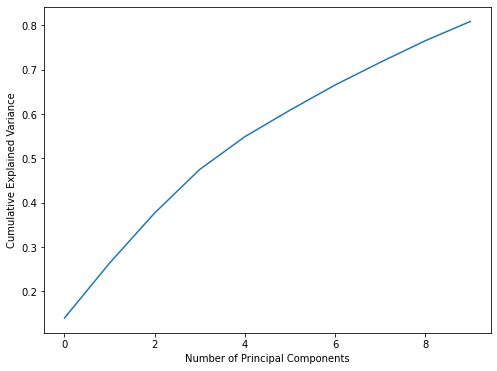

In [9]:
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative variance ratio: ', cumulative_variance_ratio)

plt.figure(figsize=(8, 6))
plt.plot(range(len(cumulative_variance_ratio)), cumulative_variance_ratio)
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

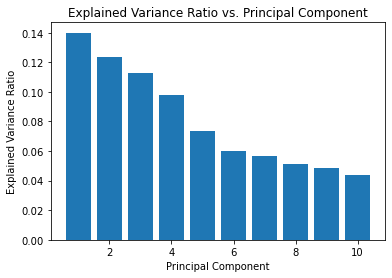

In [10]:
# Plot the degree of contribution of the principal components
plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio vs. Principal Component')
plt.show()

## Clustering

In [11]:
kmeans = KMeans(n_clusters=2,  random_state=42)
clusters = kmeans.fit_predict(x_pca)

df_bat['cluster'] = clusters

silhouette = silhouette_score(x_pca, clusters)
ari = adjusted_rand_score(df_bat['Result'], clusters)

print(f'Silhouette score: {silhouette}')
print(f'Adjusted Rand Index: {ari}')

Silhouette score: 0.11213122189611859
Adjusted Rand Index: -0.0004860403773174523


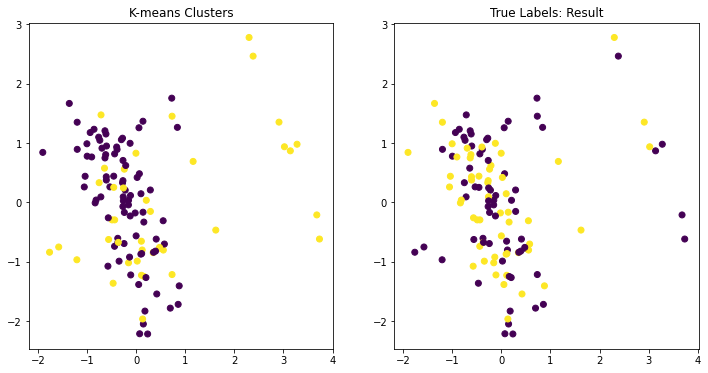

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Plot the clusters
scatter = ax1.scatter(x_pca[:, 0], x_pca[:, 1], c=clusters, cmap='viridis')
ax1.set_title('K-means Clusters')

# Plot the true labels
scatter = ax2.scatter(x_pca[:, 0], x_pca[:, 1], c=df_bat['Result'], cmap='viridis')
ax2.set_title('True Labels: Result')

plt.show()

In [13]:
# Hierarchical clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

cluster.fit_predict(x_pca)

silhouette = metrics.silhouette_score(x_pca, cluster.labels_)
print('Silhouette score: ', silhouette)

ari = metrics.adjusted_rand_score(df_bat['Result'], cluster.labels_)
print('Adjusted Rand Index: ', ari)

#There is little similarity between the clustering results and the true labels

Silhouette score:  0.20618234784420797
Adjusted Rand Index:  -0.005124423214841477


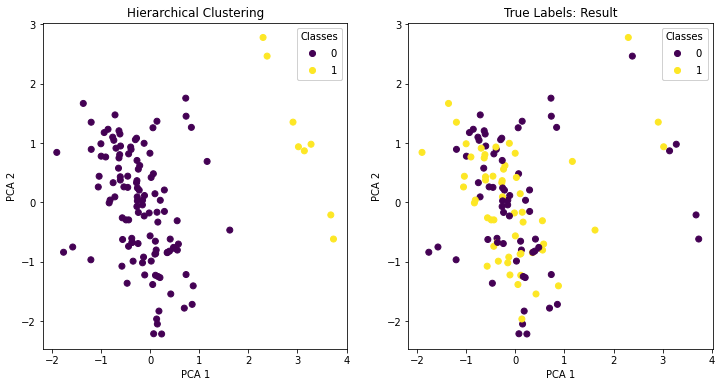

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

scatter = axs[0].scatter(x_pca[:, 0], x_pca[:, 1], c=cluster.labels_, cmap='viridis')
axs[0].set_title('Hierarchical Clustering')
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
legend2 = axs[0].legend(*scatter.legend_elements(), title="Classes")
axs[0].add_artist(legend2)


scatter = axs[1].scatter(x_pca[:, 0], x_pca[:, 1], c=df_bat['Result'], cmap='viridis')
axs[1].set_title('True Labels: Result')
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 2')
legend1 = axs[1].legend(*scatter.legend_elements(), title="Classes")
axs[1].add_artist(legend1)

plt.show()

### The clustering did not work well, so we tried modelling using the reduced dimensional data

In [15]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, df_bat['Result'], test_size=0.2, random_state=42)

In [16]:
# Logistic Regression
lr_pca = LogisticRegression()
lr_pca.fit(X_train, y_train)

y_pred = lr_pca.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        13
           1       0.92      0.92      0.92        12

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

[[12  1]
 [ 1 11]]


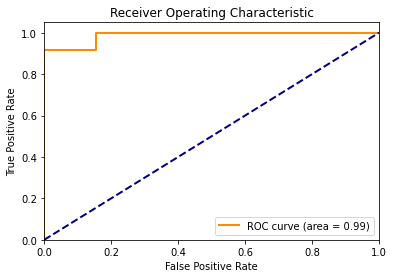

In [19]:
fpr, tpr, thresholds = roc_curve(y_test, lr_pca.predict_proba(X_test)[:,1])

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [20]:
# Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred_gnb = gnb.predict(X_test)

print(classification_report(y_test, y_pred_gnb))
print(confusion_matrix(y_test, y_pred_gnb))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        13
           1       0.92      1.00      0.96        12

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

[[12  1]
 [ 0 12]]


/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


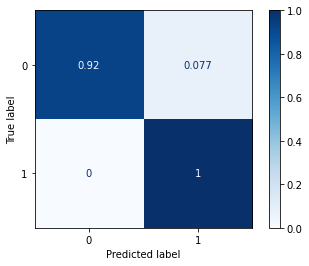

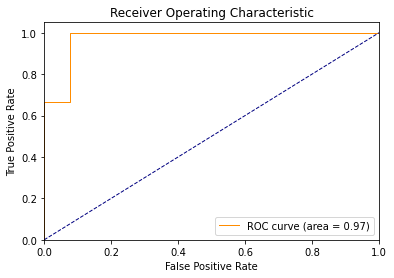

In [21]:
# Visualizing the confusion matrix
plot_confusion_matrix(gnb, X_test, y_test, cmap=plt.cm.Blues, normalize='true')

# ROC curve
y_pred_prob = gnb.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### The plain Bayesian classifier assumes independence between features, whereas the PCA reduced features may be a linear combination of the original features and therefore may not fully satisfy the independence requirement.

### Although the classifiers modeled with the reduced dimensional data were very good, we tried to model with the un-dimensioned data to compare performance

### Modelling with un-dimensionalised data

In [22]:
# Split the data into features (X) and target (y)
X = df_bat.drop('Result', axis=1)
y = df_bat['Result']

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [23]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        13
           1       0.91      0.83      0.87        12

    accuracy                           0.88        25
   macro avg       0.88      0.88      0.88        25
weighted avg       0.88      0.88      0.88        25



In [27]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': np.logspace(-4, 4, 20), 'penalty': ['l1', 'l2']}
grid_search = GridSearchCV(LogisticRegression(solver='liblinear'), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameters for Logistic Regression: ', grid_search.best_params_)

Best parameters for Logistic Regression:  {'C': 0.615848211066026, 'penalty': 'l2'}


In [28]:
clf_lr_optimized = LogisticRegression(C=0.615848211066026, penalty='l2', solver='liblinear')
clf_lr_optimized.fit(X_train, y_train)

y_pred_lr_optimized = clf_lr_optimized.predict(X_test)
print('Accuracy of Logistic Regression with optimized parameters: ', accuracy_score(y_test, y_pred_lr_optimized))

Accuracy of Logistic Regression with optimized parameters:  0.84


### Gaussian Naive Bayes

In [29]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

print("Gaussian Naive Bayes Results:")
print(classification_report(y_test, y_pred_gnb))

Gaussian Naive Bayes Results:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.75      0.75      0.75        12

    accuracy                           0.76        25
   macro avg       0.76      0.76      0.76        25
weighted avg       0.76      0.76      0.76        25



In [30]:
param_grid = {'alpha': np.linspace(0.1, 1, 10)}
grid_search = GridSearchCV(BernoulliNB(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print('Best parameter for Naive Bayes: ', grid_search.best_params_)

Best parameter for Naive Bayes:  {'alpha': 1.0}


In [31]:
clf_nb_optimized = BernoulliNB(alpha=1.0)
clf_nb_optimized.fit(X_train, y_train)

y_pred_nb_optimized = clf_nb_optimized.predict(X_test)
print('Accuracy of Naive Bayes with optimized alpha: ', accuracy_score(y_test, y_pred_nb_optimized))

Accuracy of Naive Bayes with optimized alpha:  0.84


### Tree based models: In fact it is not necessary to feature scaling, overfitting now

In [32]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
print("Decision Tree Results:")
print(classification_report(y_test, y_pred_dt))

# Bagging
bag = BaggingClassifier(random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)
print("Bagging Results:")
print(classification_report(y_test, y_pred_bag))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

# Boosting
boost = GradientBoostingClassifier(random_state=42)
boost.fit(X_train, y_train)
y_pred_boost = boost.predict(X_test)
print("Boosting Results:")
print(classification_report(y_test, y_pred_boost))

Decision Tree Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Bagging Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

Random Forest Results:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       1.00      0.83      0.91        12

    accuracy                           0.92        25
   macro avg       0.93      0.92      0.92        25
weighted av

### SVM

In [40]:
from sklearn.svm import SVC

svm = SVC(probability=True)
svm.fit(X_train, y_train)

y_pred_train_svm = svm.predict(X_train)
y_pred_test_svm = svm.predict(X_test)

print('Training Accuracy (SVM): ', accuracy_score(y_train, y_pred_train_svm))
print('Test Accuracy (SVM): ', accuracy_score(y_test, y_pred_test_svm))
print(classification_report(y_test, y_pred_test_svm))

Training Accuracy (SVM):  0.9795918367346939
Test Accuracy (SVM):  0.88
              precision    recall  f1-score   support

           0       0.81      1.00      0.90        13
           1       1.00      0.75      0.86        12

    accuracy                           0.88        25
   macro avg       0.91      0.88      0.88        25
weighted avg       0.90      0.88      0.88        25



### KNN

In [41]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(1, 25)}

knn_gscv = GridSearchCV(knn, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

print("Best parameter for KNN: ", knn_gscv.best_params_)

knn_best = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_best.fit(X_train, y_train)

y_pred_knn = knn_best.predict(X_test)

y_pred_train_knn = knn_best.predict(X_train)
y_pred_test_knn = knn_best.predict(X_test)

print('Training Accuracy (KNN): ', accuracy_score(y_train, y_pred_train_knn))
print('Test Accuracy (KNN): ', accuracy_score(y_test, y_pred_test_knn))
print(classification_report(y_test, y_pred_test_knn))

Best parameter for KNN:  {'n_neighbors': 3}
Training Accuracy (KNN):  0.9489795918367347
Test Accuracy (KNN):  0.84
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.90      0.75      0.82        12

    accuracy                           0.84        25
   macro avg       0.85      0.84      0.84        25
weighted avg       0.85      0.84      0.84        25



### Points to note: 

1.  XGBoost and CatBoost are two very popular gradient boosting decision tree algorithms. Gradient boosting is a machine learning technique where the basic idea is to use a new model at each step to correct the errors of the previous model.

2.  In both XGBoost and CatBoost, these models are decision trees. The models are added consecutively, each attempting to correct the errors of its predecessor. The final prediction is a weighted sum of all the individual tree predictions.

3.  CatBoost is particularly suitable for processing classification features.

In [ ]:
# from xgboost import XGBClassifier
# from sklearn.metrics import accuracy_score

# xgb = XGBClassifier()
# xgb.fit(X_train, y_train)
# y_pred = xgb.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
# from catboost import CatBoostClassifier
# from sklearn.metrics import accuracy_score

# catb = CatBoostClassifier()
# catb.fit(X_train, y_train)
# y_pred = catb.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

### Points to note: DNN, Not yet completed, still needs improvement in terms of model complexity